In [17]:
# scatter_plot_iris.py
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


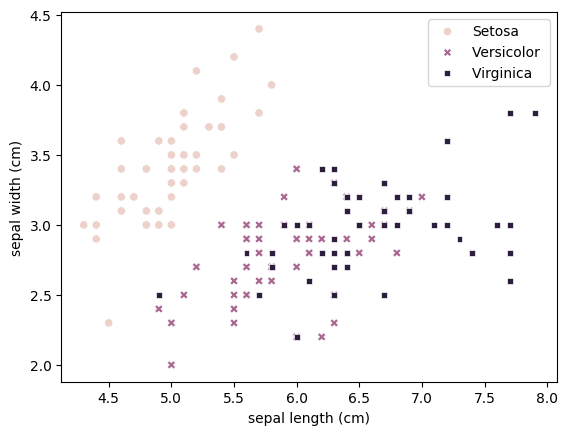

In [39]:
sns.scatterplot(data = df , x = 'sepal length (cm)', y = 'sepal width (cm)', style = 'species', hue ='species' )
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles,["Setosa", "Versicolor ", "Virginica "])




In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [42]:
lis = ['setosa', 'versi', 'virginica']

df['species'] = df['species'].map(lambda x : lis[x])

In [43]:
df['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [44]:
le.fit_transform(df['species'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [45]:
# iris_pca_logreg.py
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Reduce 4D to 2D using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Accuracy
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Predict new flower measurement
new_flower = np.array([[5.1, 3.5, 1.4, 0.2]])  # original 4D
new_reduced = pca.transform(new_flower)
prediction = model.predict(new_reduced)
print("Predicted species:", iris.target_names[prediction[0]])


Accuracy: 1.0
Predicted species: setosa


In [48]:
# svm_iris.py
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Test different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for k in kernels:
    model = SVC(kernel=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Kernel={k}, Accuracy={accuracy_score(y_test, y_pred):.2f}")


Kernel=linear, Accuracy=1.00
Kernel=poly, Accuracy=1.00
Kernel=rbf, Accuracy=1.00
Kernel=sigmoid, Accuracy=0.30


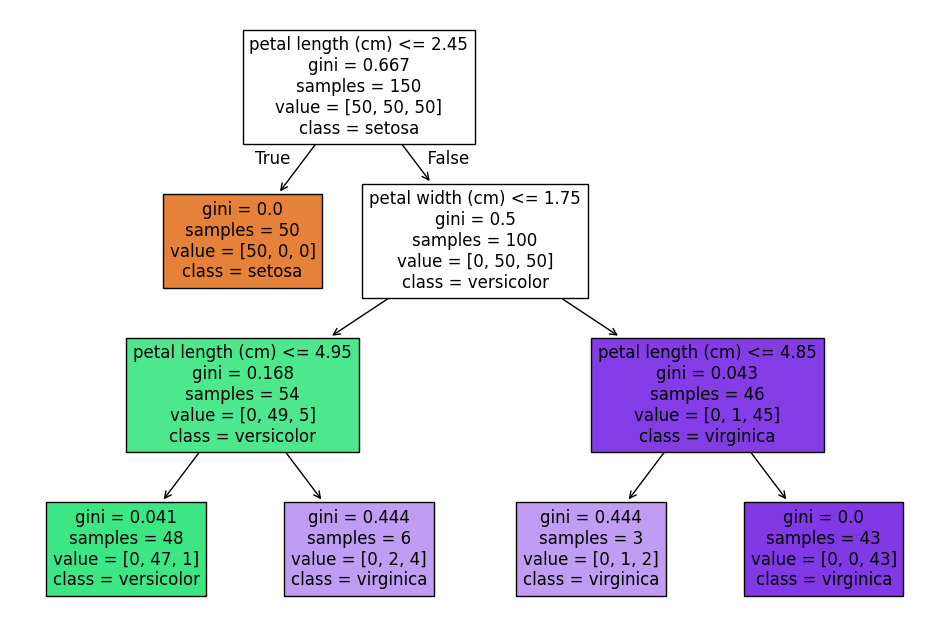

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load sample dataset
iris = load_iris()

# Train a simple decision tree
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(iris.data, iris.target)

# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(clf,feature_names=iris.feature_names, class_names = iris.target_names, filled = True )
plt.show()


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Features and target
X = df[iris.feature_names]
y = df['target']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


r = knn.predict([[4.9,3.0,1.4,0.2]], columns = iris.feature_names)


Accuracy: 1.0


c:\Users\Atharv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
